# B12207008 心理三 龍妤如

In [4]:
# 安裝必要套件
!pip install deepface opencv-python pandas matplotlib tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 24.7 MB/s eta 0:00:00
  Attempting uninstall: pytest
    Found existing installation: pytest 8.4.2
    Uninstalling pytest-8.4.2:
      Successfully uninstalled pytest-8.4.2


# Image

In [2]:
import os
from google.colab import files
import zipfile

# 1. 上傳 ZIP 檔
print("請上傳包含所有 JPG 臉部圖片的 ZIP 檔案 (例如 faces.zip):")
uploaded = files.upload()

# 取得上傳的檔名
zip_filename = next(iter(uploaded))

# 2. 解壓縮
print("正在解壓縮...")
extract_path = "data/taiwan_faces"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ 解壓縮完成！圖片已存放在 {extract_path}")

請上傳包含所有 JPG 臉部圖片的 ZIP 檔案 (例如 faces.zip):


Saving faces.zip to faces.zip
正在解壓縮...
✅ 解壓縮完成！圖片已存放在 data/taiwan_faces


In [6]:
import os
import cv2
import pandas as pd
from deepface import DeepFace
from tqdm import tqdm # 進度條工具

# --- 設定對照表 (根據 Readme.txt) ---
# 檔名第 5 碼 (Index 4) -> DeepFace 的情緒標籤
label_map = {
    'a': 'neutral',
    'b': 'happy',
    'c': 'sad',
    'd': 'angry',
    'e': 'disgust',
    'f': 'fear',
    'g': 'surprise'
}

image_folder = "data/taiwan_faces/faces_256x256"
results = []
correct_count = 0
total_count = 0

# 取得所有 jpg 檔案
# 你的 script.py 轉出來是 .jpg，所以我們只抓 jpg
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]

print(f"🚀 開始驗證 {len(image_files)} 張圖片...")

# 使用 tqdm 顯示進度條
for img_file in tqdm(image_files):
    # 1. 從檔名解析正確答案 (Ground Truth)
    # 檔名範例: 0101a02.jpg -> 第 5 個字元是 'a' (index 4)
    try:
        emotion_code = img_file[4] # 取得 'a', 'b', 'c'...
        ground_truth = label_map.get(emotion_code)

        # 如果檔名格式不對 (找不到對應情緒)，就跳過
        if ground_truth is None:
            continue

        img_path = os.path.join(image_folder, img_file)

        # 2. 執行 DeepFace 預測
        # enforce_detection=False 避免部分側面臉偵測不到而報錯
        prediction = DeepFace.analyze(img_path, actions=['emotion'], enforce_detection=False, silent=True)
        predicted_emotion = prediction[0]['dominant_emotion']

        # 3. 比對結果
        is_correct = (predicted_emotion == ground_truth)

        if is_correct:
            correct_count += 1
        total_count += 1

        # 存下詳細資料以便分析
        results.append({
            "File": img_file,
            "True_Label": ground_truth,
            "Predicted": predicted_emotion,
            "Correct": is_correct
        })

    except Exception as e:
        print(f"Error processing {img_file}: {e}")

# --- 計算與顯示結果 ---
accuracy = (correct_count / total_count) * 100 if total_count > 0 else 0

print("\n" + "="*30)
print(f"📊 驗證結果 (Taiwan Corpora)")
print("="*30)
print(f"總圖片數: {total_count}")
print(f"預測正確: {correct_count}")
print(f"準確率 (Accuracy): {accuracy:.2f}%")

# 儲存詳細報告
df_report = pd.DataFrame(results)
df_report.to_csv("validation_report.csv", index=False)
print("詳細報告已儲存至 validation_report.csv")

🚀 開始驗證 1232 張圖片...


  0%|          | 0/1232 [00:00<?, ?it/s]

25-12-05 12:59:15 - 🔗 facial_expression_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5 to /root/.deepface/weights/facial_expression_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

100%|██████████| 5.98M/5.98M [00:00<00:00, 118MB/s]
100%|██████████| 1232/1232 [02:07<00:00,  9.69it/s]


📊 驗證結果 (Taiwan Corpora)
總圖片數: 1223
預測正確: 440
準確率 (Accuracy): 35.98%
詳細報告已儲存至 validation_report.csv


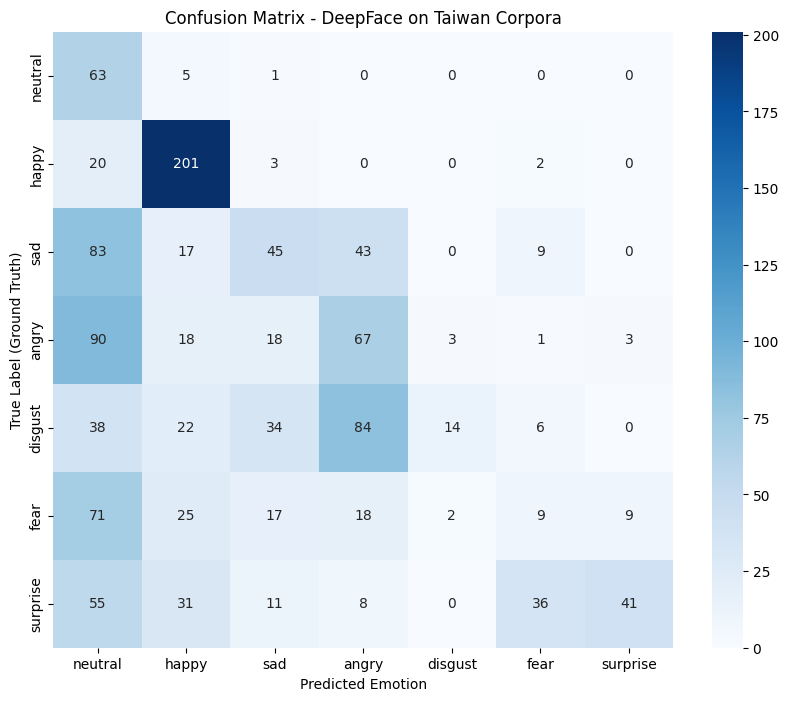

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 確保有資料
if not df_report.empty:
    plt.figure(figsize=(10, 8))

    # 定義情緒順序
    labels = ['neutral', 'happy', 'sad', 'angry', 'disgust', 'fear', 'surprise']

    # 計算混淆矩陣
    cm = confusion_matrix(df_report['True_Label'], df_report['Predicted'], labels=labels)

    # 畫熱力圖
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Emotion')
    plt.ylabel('True Label (Ground Truth)')
    plt.title('Confusion Matrix - DeepFace on Taiwan Corpora')
    plt.show()

# Video

In [8]:
import os
from google.colab import files

# 檢查影片是否已經存在
if not os.path.exists('vlog.mp4'):
    print("請上傳您的 vlog.mp4 影片檔：")
    uploaded = files.upload()
    # 確保檔名正確 (有些時候上傳會變成 vlog (1).mp4)
    for filename in uploaded.keys():
        if filename != 'vlog.mp4':
            os.rename(filename, 'vlog.mp4')
            print(f"已將 {filename} 重新命名為 vlog.mp4")
else:
    print("✅ vlog.mp4 已存在，準備開始分析！")

請上傳您的 vlog.mp4 影片檔：


Saving vlog.mp4 to vlog.mp4


🎬 開始分析 Vlog (時長: 37.7 秒, FPS: 23.976023976023978)
☕ 這可能需要一點時間，請耐心等待...


100%|█████████▉| 901/903 [00:57<00:00, 15.61it/s]



✅ 分析完成！數據已儲存至 vlog_analysis.csv


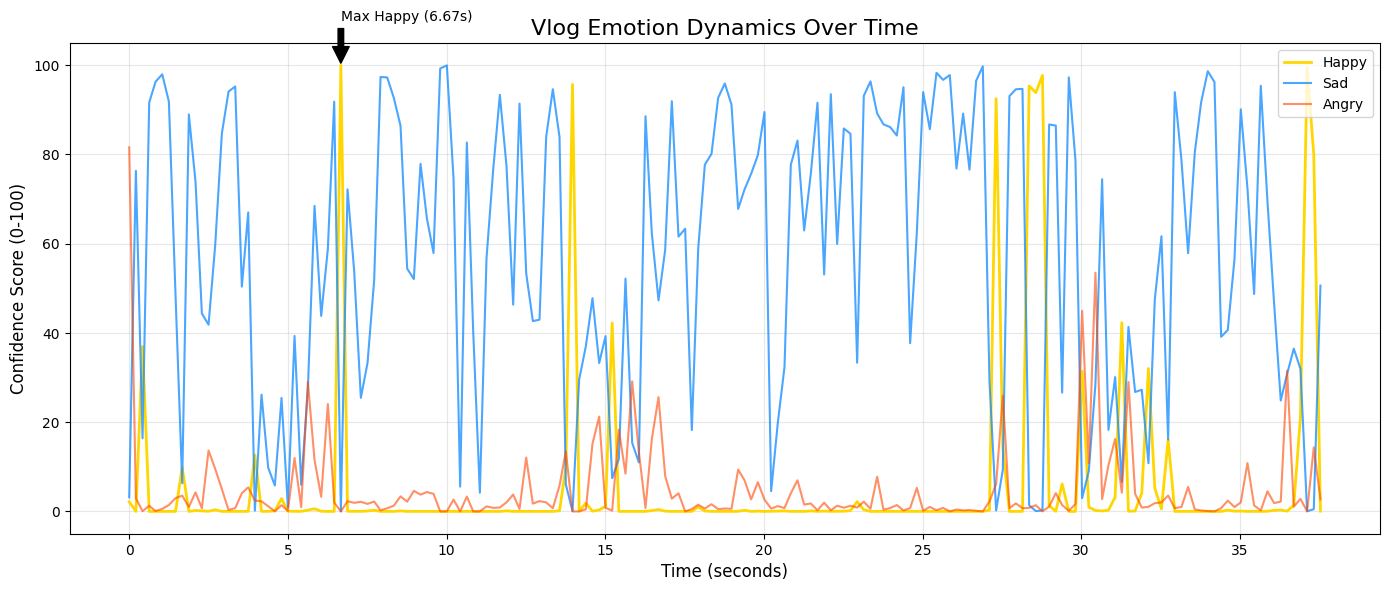

In [9]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from deepface import DeepFace
from tqdm import tqdm # 進度條

def analyze_vlog_emotion(video_path, output_csv="vlog_analysis.csv", frame_skip=5):
    # 1. 初始化
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"❌ 無法開啟影片: {video_path}")
        return None

    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / fps

    print(f"🎬 開始分析 Vlog (時長: {duration:.1f} 秒, FPS: {fps})")
    print("☕ 這可能需要一點時間，請耐心等待...")

    emotion_data = []

    # 2. 逐幀分析循環
    # 使用 tqdm 建立進度條，讓你不會覺得程式當機了
    with tqdm(total=total_frames) as pbar:
        frame_idx = 0
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            # 跳幀處理 (每 frame_skip 幀算一次)
            if frame_idx % frame_skip == 0:
                try:
                    # DeepFace 分析
                    # enforce_detection=False: 即使這幀沒看鏡頭也不要報錯
                    result = DeepFace.analyze(frame, actions=['emotion'],
                                            enforce_detection=False, silent=True)

                    # 整理數據
                    timestamp = frame_idx / fps
                    emotions = result[0]['emotion'] # 取得所有情緒分數
                    dominant = result[0]['dominant_emotion']

                    row = {
                        "Frame": frame_idx,
                        "Timestamp": round(timestamp, 2),
                        "Dominant_Emotion": dominant,
                        "neutral": emotions['neutral'],
                        "happy": emotions['happy'],
                        "sad": emotions['sad'],
                        "angry": emotions['angry'],
                        "fear": emotions['fear'],
                        "surprise": emotions['surprise'],
                        "disgust": emotions['disgust']
                    }
                    emotion_data.append(row)

                except Exception as e:
                    # 偶爾沒抓到臉是正常的，直接 pass
                    pass

            frame_idx += 1
            pbar.update(1) # 更新進度條

    cap.release()

    # 3. 儲存結果
    if not emotion_data:
        print("❌ 分析失敗：影片中似乎沒有偵測到任何人臉。")
        return None

    df = pd.DataFrame(emotion_data)
    df.to_csv(output_csv, index=False)
    print(f"\n✅ 分析完成！數據已儲存至 {output_csv}")

    return df

# --- 執行函式 ---
df_vlog = analyze_vlog_emotion("vlog.mp4", frame_skip=5)

# --- 步驟 3: 視覺化結果 (Sprint Goal: Time Series) ---
if df_vlog is not None:
    plt.figure(figsize=(14, 6))

    # 這裡你可以選擇要畫哪些情緒，通常畫這幾個最重要：
    plt.plot(df_vlog['Timestamp'], df_vlog['happy'], label='Happy', color='#FFD700', linewidth=2)
    plt.plot(df_vlog['Timestamp'], df_vlog['sad'], label='Sad', color='#1E90FF', linewidth=1.5, alpha=0.8)
    plt.plot(df_vlog['Timestamp'], df_vlog['angry'], label='Angry', color='#FF4500', linewidth=1.5, alpha=0.6)

    # 如果你也想看中性情緒，可以把下面這行取消註解
    # plt.plot(df_vlog['Timestamp'], df_vlog['neutral'], label='Neutral', color='gray', linestyle='--', alpha=0.5)

    plt.title("Vlog Emotion Dynamics Over Time", fontsize=16)
    plt.xlabel("Time (seconds)", fontsize=12)
    plt.ylabel("Confidence Score (0-100)", fontsize=12)
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)

    # 標示出最強烈的情緒點 (Optional)
    max_happy_time = df_vlog.loc[df_vlog['happy'].idxmax()]['Timestamp']
    max_happy_val = df_vlog['happy'].max()
    plt.annotate(f'Max Happy ({max_happy_time}s)',
                 xy=(max_happy_time, max_happy_val),
                 xytext=(max_happy_time, max_happy_val+10),
                 arrowprops=dict(facecolor='black', shrink=0.05))

    plt.tight_layout()
    plt.savefig("vlog_emotion_chart.png", dpi=300) # 存成高畫質圖片
    plt.show()